### **PROBLEM STATEMENT**

To predict the apt price of a car based on the specifications given. Hence a
***supervised ML regression model*** needs to be created as the target variable is continuous in nature.

### **IMPORTING THE BASIC LIBRARIES**

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### **IMPORTING THE DATASET**

In [38]:
data= pd.read_csv("/content/drive/MyDrive/AI/Basic_python_implementation_neural_network/CarPricesData.csv")
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0


### **DOMAIN ANALYSIS**

- The dataset contains the features related to factors that decide the price of a car.

The target variable is

***1. Price:***  
- The Price of the car in dollars,

and the remaining nine independent features include:

***2. Age:***
  - The age of the car in months

***3. KM***
  - How many KMS did the car was used

***4. FuelType:***
  - Petrol/Diesel/CNG car

***5. HP:***
  - Horse power of the car

***6. MetColor:***
  - Whether car has metallic color or not

***7. Automatic:***
  - Whether car has automatic transmission or not

***8. CC:***
  - The engine size of the car

***9. Doors:***
  - The number of doors in the car

***10. Weight:***
  - The weight of the car


### **BASIC CHECKS:**

In [39]:
# checking the no of rows and columns

data.shape

(1436, 10)

In [ ]:
# checking the last five rows

data.tail()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0
1435,6950,76.0,1,Petrol,110,0,0,1600.0,5,1114.0


In [ ]:
# checking the datatypes

data.dtypes

Price          int64
Age          float64
KM             int64
FuelType      object
HP             int64
MetColor       int64
Automatic      int64
CC           float64
Doors          int64
Weight       float64
dtype: object

##### Insights:
- all are numerical columns with int64 and float64 datatypes except the FuelType column.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1434 non-null   float64
 2   KM         1436 non-null   int64  
 3   FuelType   1432 non-null   object 
 4   HP         1436 non-null   int64  
 5   MetColor   1436 non-null   int64  
 6   Automatic  1436 non-null   int64  
 7   CC         1434 non-null   float64
 8   Doors      1436 non-null   int64  
 9   Weight     1434 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 112.3+ KB


##### Insights:
- There are certain features with null values such as Age, FuelType, CC and Weight.

In [50]:
data.describe().T.sort_values('std', ascending = False).style.background_gradient(cmap= "PuBuGn")

,count,mean,std,min,25%,50%,75%,max
KM,1436.000000,68533.259749,37506.448872,1.000000,43000.000000,63389.500000,87020.750000,243000.000000
Price,1436.000000,10730.824513,3626.964585,4350.000000,8450.000000,9900.000000,11950.000000,32500.000000
CC,1434.000000,1566.990934,187.178221,1300.000000,1400.000000,1600.000000,1600.000000,2000.000000
Weight,1434.000000,1072.487448,52.672475,1000.000000,1040.000000,1070.000000,1085.000000,1615.000000
Age,1434.000000,55.986750,18.581796,1.000000,44.000000,61.000000,70.000000,80.000000
HP,1436.000000,101.502089,14.981080,69.000000,90.000000,110.000000,110.000000,192.000000
Doors,1436.000000,4.033426,0.952677,2.000000,3.000000,4.000000,5.000000,5.000000
MetColor,1436.000000,0.674791,0.468616,0.000000,0.000000,1.000000,1.000000,1.000000
Automatic,1436.000000,0.055710,0.229441,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
data.describe(include= 'object').T

,count,unique,top,freq
FuelType,1432,3,Petrol,1260


##### Insights:

1. **KM (Kilometers)**:
   - The ***average mileage*** of the cars in the dataset is approximately ***68,533 kilometers***, with a standard deviation of about 37,506 kilometers.
   - The mileage ranges from 1 kilometer to 243,000 kilometers.
   - 75% of the cars have a mileage of 87,021 kilometers or less.

2. **Price**:
   - The ***average price*** of the cars is around **10,731 dollars**, with a standard deviation of approximately $3,627.
   - Prices range from 4,350 to 32,500 dollars.
   - 75% of the cars are priced at 11,950 dollars or less.

3. **CC (Engine Capacity)**:
   - The ***average engine capacity*** is approximately ***1567 cc***, with a standard deviation of around 187 cc.
   - Engine capacities range from 1300 cc to 2000 cc.

4. **Weight**:
   - The ***average weight*** of the cars is about ***1072 kilograms***, with a standard deviation of roughly 53 kilograms.
   - Weights range from 1000 kilograms to 1615 kilograms.

5. **Age**:
   - The ***average age*** of the cars is approximately ***56 months***, with a standard deviation of about 18.6 months.
   - The age of cars in the dataset ranges from 1 month to 80 months.
   - 75% of the cars are 70 months old or less(less than 6 years).

6. **HP (Horsepower)**:
   - The ***average horsepower*** of the cars is around ***102 HP***, with a standard deviation of approximately 15 HP.
   - Horsepower ranges from 69 HP to 192 HP.

7. **Doors**:
   - On average, the cars have around 4 doors, with a standard deviation of about 1 door.
   - The number of doors ranges from 2 to 5.

8. **MetColor (Metallic Color)**:
   - About ***67.5% of the cars*** in the dataset have a metallic color, while the remaining 32.5% do not.

9. **Automatic**:
   - Only about 5.6% of the cars are automatic transmission, while the ***majority (94.4%) have manual transmission.***

In [51]:
# no of unique elements in each of the column
data.nunique().to_frame().T.style.background_gradient(cmap= "PuBuGn")

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,236,77,1263,3,12,2,2,12,4,59


##### Insights:
- From the above check, it is clear that there are certain features which have ***less than 20 unique values*** such as FuelType, MetColor, Automatic, CC and Doors.
- The above mentioned are the categorical features and the rest are continuous features.

**TARGET VARIABLE**: "Price"

**NUMERICAL**
- **Continuous features**: "Age", "KM", "Weight"
- **discrete features**: "HP", "CC", "Doors"

**CATEGORICAL**
- **binary features**: "MetColor", "Automatic".
- **nominal features**: "FuelType"

In [52]:
# Unique categories of all the categorical features

categorical_features= ["HP", "CC", "Doors","MetColor", "Automatic","FuelType"]

for column in categorical_features:
  values= data[column].value_counts(normalize= True).reset_index()
  values.columns= [column, 'value_counts']

  # Adding color to the df
  styled_df= values.style.background_gradient(cmap= "PuBuGn")
  display(styled_df)
  print("\n")

,HP,value_counts
0,110,0.581476
1,86,0.173398
2,97,0.114206
3,72,0.050836
4,90,0.025070
5,69,0.023677
6,107,0.014624
7,192,0.007660
8,116,0.006267
9,98,0.001393


,CC,value_counts
0,1600.000000,0.589261
1,1300.000000,0.172245
2,1400.000000,0.114365
3,2000.000000,0.082985
4,1900.000000,0.020921
5,1800.000000,0.009763
6,1598.000000,0.002789
7,1587.000000,0.002789
8,1995.000000,0.001395
9,1398.000000,0.001395


,Doors,value_counts
0,5,0.469359
1,3,0.433148
2,4,0.096100
3,2,0.001393


,MetColor,value_counts
0,1,0.674791
1,0,0.325209


,Automatic,value_counts
0,0,0.944290
1,1,0.055710


,FuelType,value_counts
0,Petrol,0.879888
1,Diesel,0.108240
2,CNG,0.011872


#### Insights:
- Around **58%** of cars constitute horsepower capacity of  **110HP**

- Around 58% of vehicles have the engine capacity of **1600cc.**

- Around 46% of cars have 5 number of doors and 43% contains 3 doors.

- 67% of cars have metallic color.

- 94% of cars do not have automatic transmission.

- Around 87% of them are petrol vehicles, 10% consume diesel and CNG fueltype is the least category.

### **EXPLORATORY DATA ANALYSIS**

#### **TARGET VARIABLE**

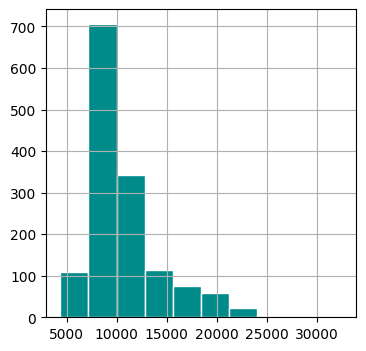

In [91]:
# creating bar plot as the target variable is continuous

plt.figure(figsize= (4,4))
data['Price'].hist(color= "darkcyan", ec= "white")
plt.show()

#### Insights:
- The data of the target variable is distributed with sufiicient number of rows for each type of values to learn from.

#### **INDEPENDENT FEATURES**

#### Distribution of continuous and categorical features

In [57]:
target= 'Price'

independent_features= [column for column in data.drop("Price", axis= 1)]

# As per the basic checks,
categorical_features= ["HP", "CC", "Doors","MetColor", "Automatic","FuelType"]
continuous_features= ["Age", "KM", "Weight"]

print(f'Target variable: {target}')
print(f'No of independent features: {len(independent_features)}')
print(f'No of categorical features: {len(categorical_features)}')
print(f'No of continuous features: {len(continuous_features)}')

Target variable: Price
No of independent features: 9
No of categorical features: 6
No of continuous features: 3


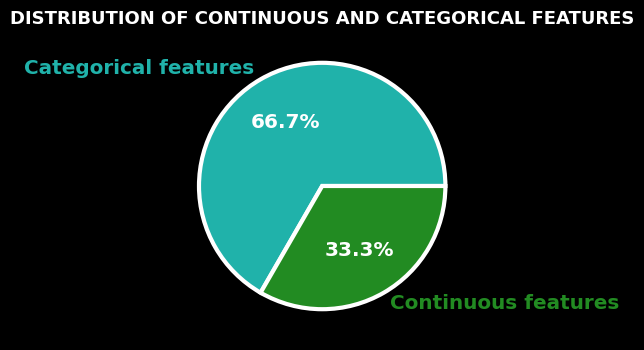

In [76]:
# piechart showing the distribution of predictors

fig, ax= plt.subplots(figsize= (4, 4), facecolor= 'black')
patches, texts, pcts= ax.pie([len(categorical_features), len(continuous_features)],
                             autopct= '%.1f%%',
                             labels= ['Categorical features', 'Continuous features'],
                             colors=['lightseagreen', 'forestgreen'],
                             textprops= {'size': 'x-large'},
                             wedgeprops= {'linewidth':3, 'edgecolor': 'white'})


# styling the percent values
plt.setp(pcts, fontweight= 'bold', color= 'white')
plt.setp(texts, fontweight= 600)

# for each wedge, styling the corresponding text label color---> to the wedge's face color
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

plt.title('DISTRIBUTION OF CONTINUOUS AND CATEGORICAL FEATURES', color= 'white', fontsize= 13, fontweight = 'bold')
plt.show()

#### **UNIVARIATE ANALYSIS**

#### **CATEGORICAL VARIABLES**

In [77]:
categorical_features

['HP', 'CC', 'Doors', 'MetColor', 'Automatic', 'FuelType']

In [88]:
# defining a function to plot multiple barplots at once

def plot_bar_charts(data, columns):


  fig, axes= plt.subplots(2, 3, figsize= (15, 10))
  fig.suptitle(f'Barcharts of {str(columns)}')
  # fig.suptitle()- adds a centered title ('Bar charts') to the entire figure.

  # Iterating over each subplot (ax) and each column name (col) simultaneously using zip().
  # The flatten() method -to iterate over the subplots in a flattened manner (1D array).
  for ax, col in zip(axes.flatten(), columns):
    data[col].value_counts().plot(kind= "bar", ax= ax, color= 'yellowgreen')
    ax.set_title(col)

    # Displaying bar values in percentage rounded off to two decimal digits with '%' sign
    # calculates the total no of datapoints for %
    total = float(len(data))

    # iterates through each patch (bar)
    for p in ax.patches:
      # get_height()--> height of the current bar
      height = p.get_height()
      # positions the text at the center of each bar
      ax.text(p.get_x() + p.get_width() / 2., height + 5,
                  f'{height / total * 100:.2f}%', ha="center", fontsize=8, fontweight= 'bold')

  plt.tight_layout()
  plt.show()

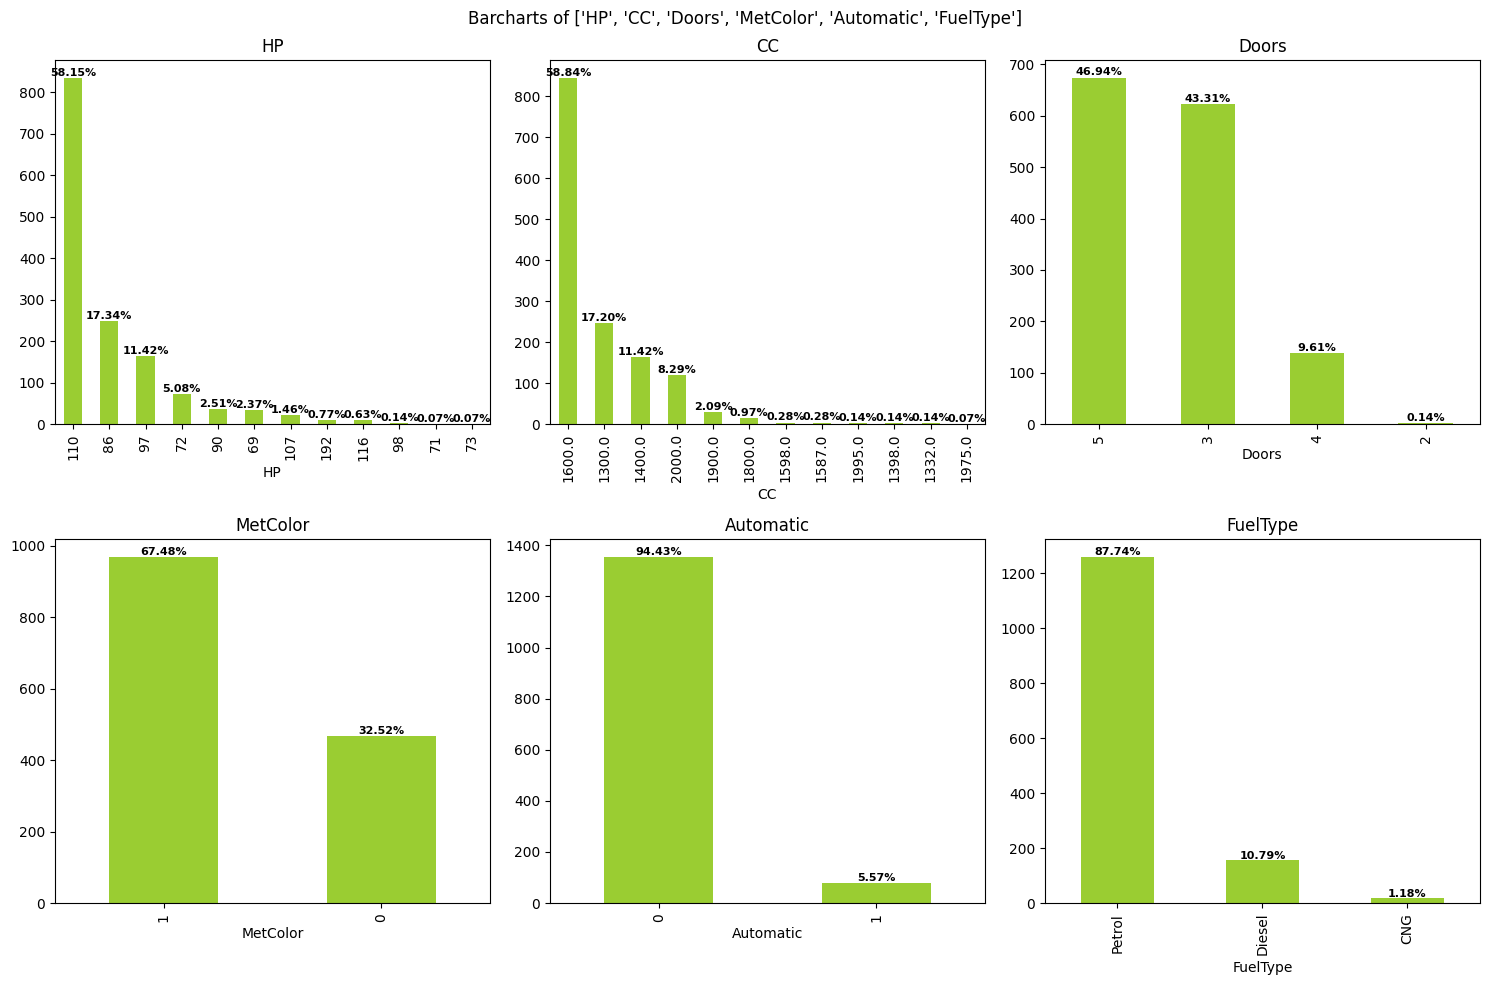

In [89]:
# Calling the function
plot_bar_charts(data= data, columns= ['HP', 'CC', 'Doors', 'MetColor', 'Automatic', 'FuelType'])

#### Insights:
- Around **58%** of cars constitute horsepower capacity of  **110HP**

- Around 58% of vehicles have the engine capacity of **1600cc.**

- Around 46% of cars have 5 number of doors and 43% contains 3 doors.

- 67% of cars have metallic color.

- 94% of cars do not have automatic transmission.

- Around 87% of them are petrol vehicles, 10% consume diesel and CNG fueltype is the least category.

#### **CONTINUOUS VARIABLES**

In [90]:
continuous_features

['Age', 'KM', 'Weight']

<Figure size 1500x1000 with 0 Axes>

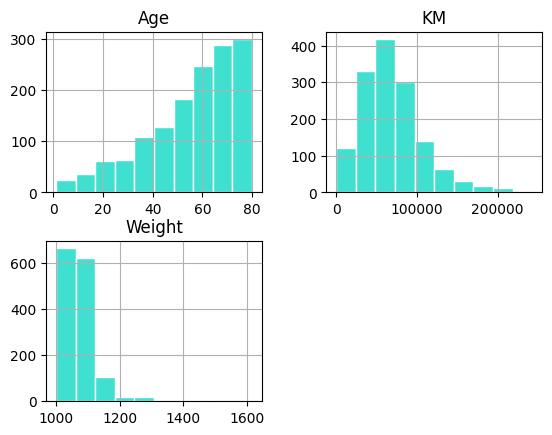

In [95]:
plt.figure(figsize= (15, 10))
data.hist(['Age', 'KM', 'Weight'], color= "turquoise", ec= "white")
plt.show()

##### Insights:
- Age: shows negatively skewed distribution.
- KM: shows positively skewed distribution.
- weight: distribution is good but outliers are seen beyond 1300.

#### **BIVARIATE ANALYSIS**